# Plot creation for the array paper

for tweaking plot layout,colors,etc for simulation data that has already been generated

In [2]:
from matplotlib import colors
import matplotlib.pyplot as plt

## local imports
import os,sys
sys.path.append(os.path.join("..","."))
from field_funcs import * # my helper functions
from simfuncs import * # for saving/retreiving data
from numpy.random import random as rand

## make the display wide
from IPython.core.display import HTML, display, Image
display(HTML("<style>.container{width:100% !important;}</style>"))

# image path 
imagedir = os.path.join('.','paper_data')
print("images saved in", imagedir)

# for matplotlib labels
fontsize=14

def savefigure(fname):
    assert len(fname.split(".")), "fname should have exactly one period '.', before the extension"
    fname = fname.split('.')
    fname = fname[0] + '_' +str(int(10000*rand())) + '.' + fname[1]
    filepath = os.path.join(imagedir,fname)
    plt.savefig(filepath, bbox_inches='tight')
    print("saved file to",filepath)
    
plt.rcParams['font.size'] = '14'

images saved in .\paper_data


In [209]:
flie="myname.someext"
flie = flie.split('.')
flie = flie[0] + '_' +str(int(10000*rand())) + '.' + flie[1]
flie

'myname_1092.someext'

In [206]:
int(10000*rand())

923

## Airy Gauss beam

In [212]:
data = soln_from_csv(fname=os.path.join(imagedir,'airygauss.csv'),labels=False,datatype=float)

saved file to .\paper_data\airygauss_gaussian_compare_4509.svg


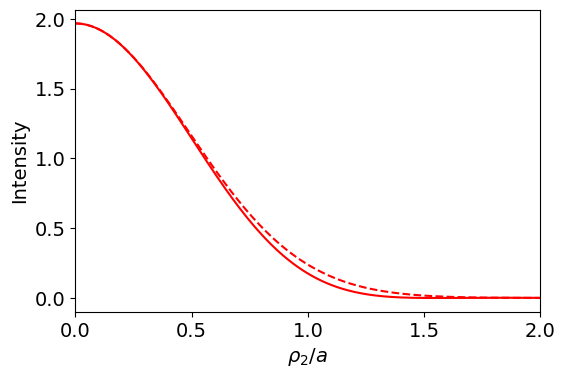

In [213]:
fig, ax = plt.subplots()
fig.dpi=100
color='red'

# for side in ['top','right']:
#     ax.spines[side].set_visible(False)
ax.plot(data[1],data[0],label="Airy-Gauss",color=color)
ax.set_xlim((0,2))
ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
ax.plot(data[1],ypts,label="Gaussian", color=color,linestyle='--')
ax.set_xlabel(r'$\rho_2/a$')
ax.set_ylabel('Intensity')
# ax.legend(loc=9)

w0 = 0.974e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-2*(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
e_gz = lambda z: 1/sqrt(1+(z/zR)**2)

# ax.plot(,e_g(zpts/1e6)**2,color=colors[1],linestyle='--')
# ax.plot(zpts,(1 - e_gz(zpts/1e6)**2),color=colors[0],linestyle='--')

savefigure('airygauss_gaussian_compare.svg')

saved file to .\paper_data\airygauss_gaussian_compare_zoomed_8721.svg


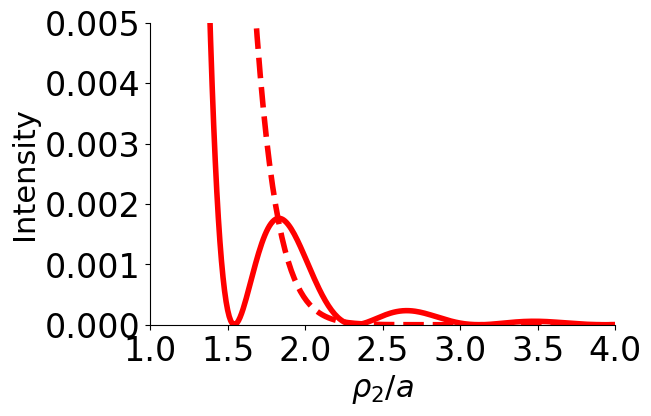

In [214]:
fig, ax = plt.subplots()
fig.dpi=100
color='red'

for side in ['top','right']:
    ax.spines[side].set_visible(False)
ax.plot(data[1],data[0],label="Airy-Gauss",color=color,lw=4)

ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
ax.plot(data[1],ypts,label="Gaussian", color=color,lw=4,linestyle='--')
ax.set_xlabel(r'$\rho_2/a$',fontsize=22)
ax.set_ylabel('Intensity',fontsize=22)
ax.set_ylim((0,0.005))
ax.set_xlim((1,4))

plt.xticks(fontsize=24)

plt.yticks(fontsize=24)


# ax.legend(loc=9)

savefigure('airygauss_gaussian_compare_zoomed.svg')

## xy intensity plots

In [73]:
## retreive files

files = [os.path.join(imagedir,f) for f in
         ['bright_input_1625939485.csv',
          'bright_focus_1625939485.csv',
          'bright_talbot_1625939490.csv',
          'bright_phases_input_1625939498.csv',
          'bright_phases_focus_1625939499.csv',
          'bright_phases_talbot_1625939503.csv',
          'bright_pos_input_1625939512.csv',
          'bright_pos_focus_1625939512.csv',
          'bright_pos_talbot_1625939516.csv',
          'bright_asym_input_1625939524.csv',
          'bright_asym_focus_1625939525.csv',
          'bright_asym_talbot_1625939529.csv',
          'dark_input_1625939539.csv',
          'dark_focus_1625939540.csv',
          'dark_talbot_1625939544.csv',
          'dark_pos_input_1625939552.csv',
          'dark_pos_focus_1625939553.csv',
          'dark_pos_talbot_1625939557.csv',
          'dark_asym_input_1625939565.csv',
          'dark_asym_focus_1625939566.csv',
          'dark_asym_talbot_1625939569.csv',
          'bright_dark_input_1625939581.csv',
          'bright_dark_focus_1625939583.csv',
          'bright_dark_talbot_1625939587.csv'
         ]]

focals = [files[i] for i in range(len(files)) if not (i+2) % 3]
focals += ['.\paper_data\spatial_spectral_incoh_focus_1625945900.csv']

talbots = [files[i] for i in range(len(files)) if not (i+1) % 3]

bright_talbots = talbots[:4]
dark_talbots = talbots[4:-1]
dark_talbots += ['.\paper_data\spatial_spectral_incoh_talbot_1625945902.csv']
talbots += ['.\paper_data\spatial_spectral_incoh_talbot_1625945902.csv']

In [67]:
focals

['.\\paper_data\\bright_focus_1625939485.csv',
 '.\\paper_data\\bright_phases_focus_1625939499.csv',
 '.\\paper_data\\bright_pos_focus_1625939512.csv',
 '.\\paper_data\\bright_asym_focus_1625939525.csv',
 '.\\paper_data\\dark_focus_1625939540.csv',
 '.\\paper_data\\dark_pos_focus_1625939553.csv',
 '.\\paper_data\\dark_asym_focus_1625939566.csv',
 '.\\paper_data\\bright_dark_focus_1625939583.csv',
 '.\\paper_data\\spatial_spectral_incoh_focus_1625945900.csv']

In [74]:
bright_talbots, dark_talbots

(['.\\paper_data\\bright_talbot_1625939490.csv',
  '.\\paper_data\\bright_phases_talbot_1625939503.csv',
  '.\\paper_data\\bright_pos_talbot_1625939516.csv',
  '.\\paper_data\\bright_asym_talbot_1625939529.csv'],
 ['.\\paper_data\\dark_talbot_1625939544.csv',
  '.\\paper_data\\dark_pos_talbot_1625939557.csv',
  '.\\paper_data\\dark_asym_talbot_1625939569.csv',
  '.\\paper_data\\spatial_spectral_incoh_talbot_1625945902.csv'])

saved file to .\paper_data\xyplot_cmap_inferno_bright_focus_1625939485.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_phases_focus_1625939499.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_pos_focus_1625939512.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_asym_focus_1625939525.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_focus_1625939540.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_pos_focus_1625939553.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_asym_focus_1625939566.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_dark_focus_1625939583.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_spatial_spectral_incoh_focus_1625945900.csv.png


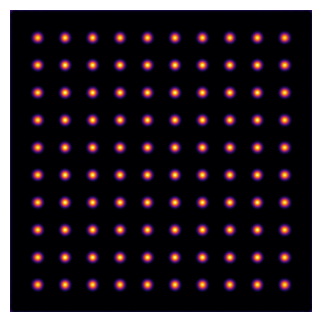

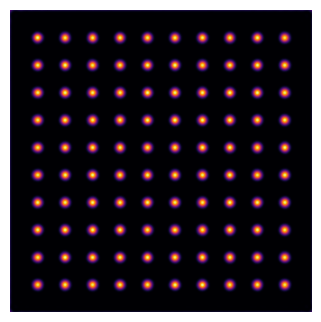

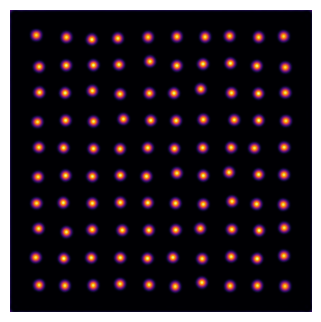

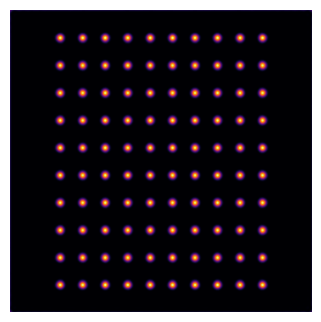

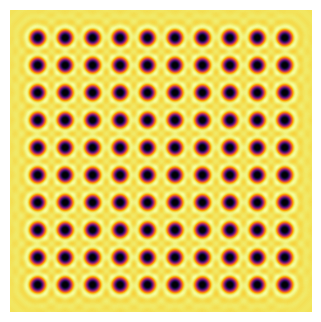

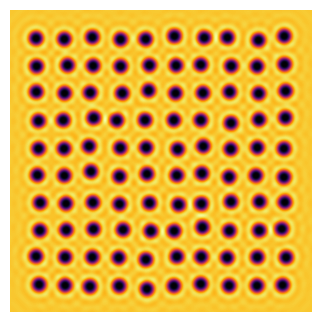

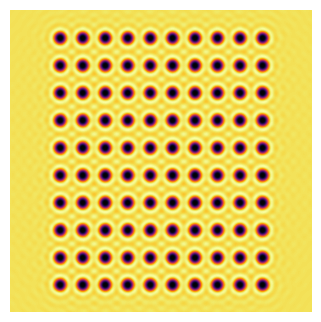

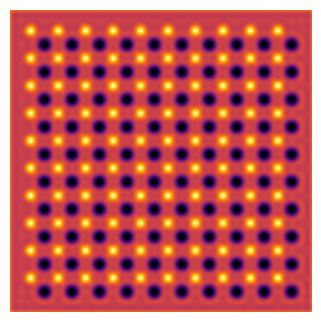

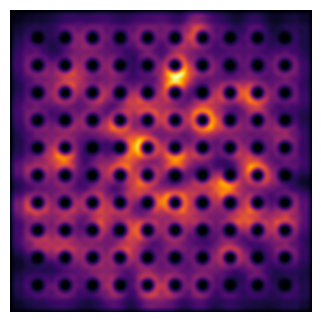

In [70]:
colormap = 'inferno'

focal_data = [soln_from_csv(t,labels=False,metastr=True,
                                  datatype=float)
               for t in focals
              ]

for datatuple,fsuffix in zip(focal_data,focals):
    data,_ = datatuple
    fig,ax = figax()
    fig.dpi=100
    cax = ax.imshow(data, cmap=colormap)
    cax.set_norm(colors.Normalize(vmin=0, vmax=1))
    ax.set_axis_off()

    savefigure(f"xyplot_cmap_{colormap}_"+fsuffix[len(imagedir)+1:]+".png")

saved file to .\paper_data\xyplot_cmap_inferno_bright_talbot_1625939490.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_phases_talbot_1625939503.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_pos_talbot_1625939516.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_asym_talbot_1625939529.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_talbot_1625939544.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_pos_talbot_1625939557.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_asym_talbot_1625939569.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_dark_talbot_1625939587.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_spatial_spectral_incoh_talbot_1625945902.csv.png


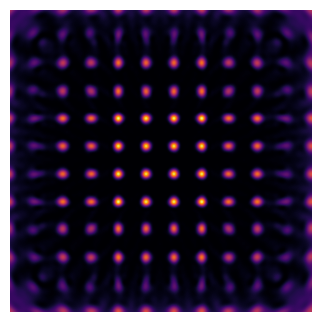

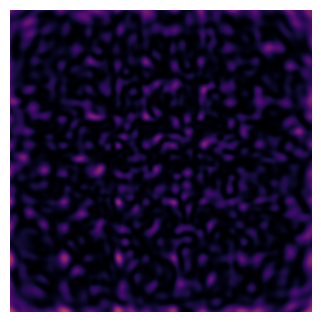

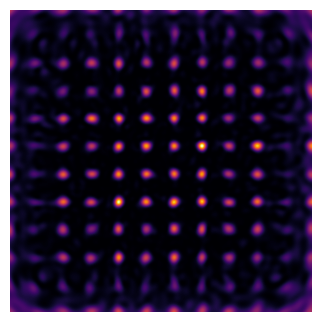

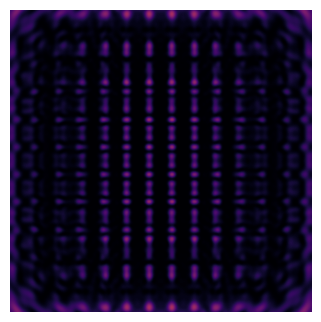

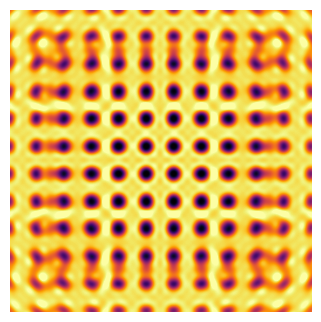

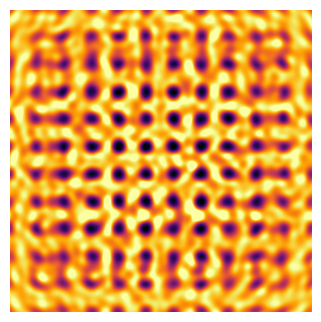

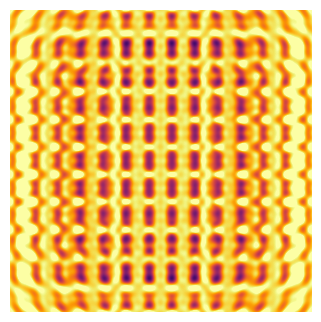

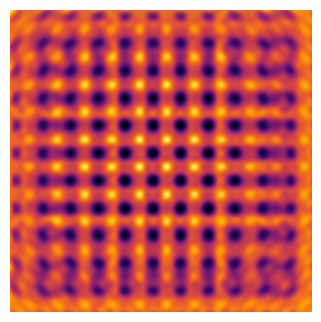

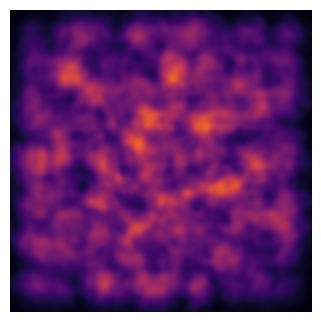

In [75]:
colormap = 'inferno'

talbot_data = [soln_from_csv(t,labels=False,metastr=True,
                                  datatype=float)
               for t in talbots
              ]

for datatuple,fsuffix in zip(talbot_data,talbots):
    data,_ = datatuple
    fig,ax = figax()
    fig.dpi=100
    cax = ax.imshow(data, cmap=colormap)
    cax.set_norm(colors.Normalize(vmin=0, vmax=1))
    ax.set_axis_off()

    savefigure(f"xyplot_cmap_{colormap}_"+fsuffix[len(imagedir)+1:]+".png")

## xz intensity plots
includes line profile in both xz AND xy

TODO: run the simulation again, but 

### experimental data

In [65]:
data = os.path.join(imagedir,'multimode_trap_yz_reconstruction.csv')
sim = os.path.join(imagedir,'dark_axial_1626964104.csv')

In [66]:
colormap = 'inferno'
yz_data = soln_from_csv(data,labels=False,metastr=False,datatype=float)
yz_data = array(yz_data)

# compare to numerical simulation
yz_sim,meta =  soln_from_csv(sim,labels=True,metastr=True,datatype=float)
yz_sim = array(yz_sim)

In [67]:
meta

['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0.7128324356402513, t1=1, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']

saved file to .\paper_data\yz_data_inferno_axes_off_pt025asp_261.svg


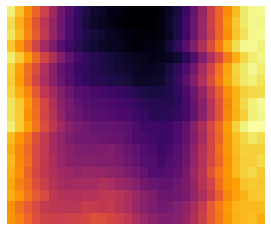

In [100]:
fig,ax = plt.subplots()
cax=ax.imshow(yz_data/amax(yz_data),cmap=colormap,extent=[-0.00345*15,0.00345*15,0,3.5])
# ax.set_xlabel(r'$\rho$ [mm]')
# ax.set_ylabel('z [mm]')
# cax.set_norm(colors.Normalize(vmin=0, vmax=1))
# fig.colorbar(cax)
ax.set_axis_off()
ax.set_aspect(0.025)
# savefigure('yz_data_inferno_axes_off_pt025asp.svg')

saved file to .\paper_data\yz_sim_inferno_axes_off_40asp_2206.svg


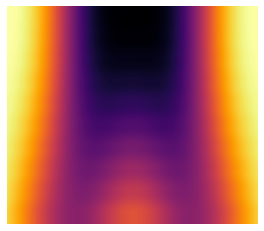

In [104]:
fig,ax = plt.subplots()
cax=ax.imshow(np.transpose(yz_sim/amax(yz_sim))[:10,270:730],cmap=colormap)#,extent=[-0.00345*15,0.00345*15,0,3.5])
# ax.set_xlabel(r'$\rho$ [mm]')
# ax.set_ylabel('z [mm]')
# cax.set_norm(colors.Normalize(vmin=0, vmax=1))
# fig.colorbar(cax)
ax.set_axis_off()
ax.set_aspect(40)
# savefigure('yz_sim_inferno_axes_off_40asp.svg')

In [70]:
yz_sim.shape

(1001, 101)

In [41]:
yz_data.shape

(19, 31)

### simulation data

In [3]:
axials = [os.path.join(imagedir,f) for f in 
          ['bright_axial_1626964002.csv','dark_axial_1626964104.csv']]

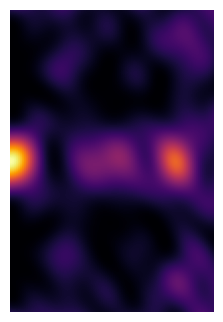

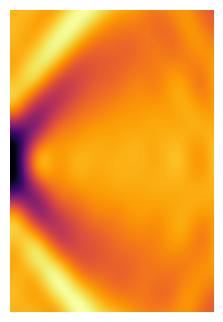

In [4]:
colormap = 'inferno'

axial_data = [soln_from_csv(t,labels=False,metastr=True,
                                  datatype=float)
               for t in axials
              ]

for datatuple,fsuffix in zip(axial_data,axials):
    data,_ = datatuple
    fig,ax = plt.subplots()
#     ax.set_aspect(1.5)
    fig.dpi=100
    cax = ax.imshow(data, cmap=colormap)
#     cax.set_norm(colors.Normalize(vmin=0, vmax=1))
    ax.set_axis_off()
    ax.set_aspect(0.15)

#     savefigure(f"xyplot_cmap_{colormap}_"+fsuffix[len(imagedir)+1:]+".png")

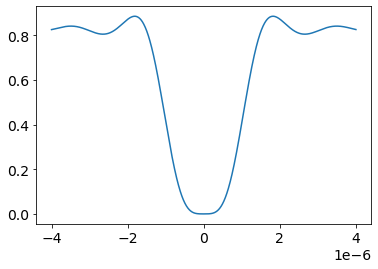

In [5]:
mag = 100
d=4e-4
datat = array(data).transpose()
plt.plot(linspace(-d/mag,d/mag,len(data)),datat[0])

In [6]:
len(data[500]),len(data)

(101, 1001)

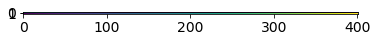

In [76]:
plt.imshow(data)

In [72]:
len(data[1])

401

In [8]:
datatuple[1]

['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0.7128324356402513, t1=1, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']

saved file to .\paper_data\plt_z_rho_confinement_red_blue_5395.svg


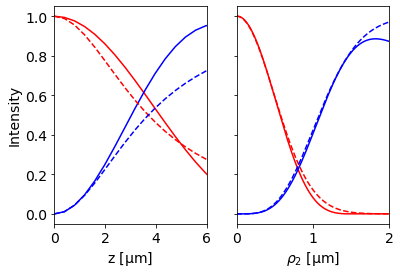

In [10]:
# labels = ['I_{AG}','|1 - E_{AG}|^2','|E_G|^2','|1 - E_G|^2']
labels = ['$|E_{AG}|^2$','$|1 - E_{AG}|^2$']
colors = ['red','blue']
style = ['-','-']

mag = 100
d=4e-4

fnt = 14
fig,axes = plt.subplots(nrows=1,ncols=2,sharey=True)
ax,ax1 = axes
# plot axial profiles compared to Gaussian-based traps
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = len(data)//2
    zpts = linspace(0,3.975155279503107e-05,len(data[0]))/1e-6

    ax.plot(zpts,data[xrow]/max(data[xrow]),label=l,color=c)#,lw=4)
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'z [$\mathrm{\mu m}$]',fontsize=fnt)
    ax.set_ylabel('Intensity',fontsize=fnt)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((0,6))

style = ['-','-']

w0 = 0.974e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
e_gz = lambda z: 1/sqrt(1+(z/zR)**2)

ax.plot(zpts,e_gz(zpts/1e6)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax.plot(zpts,(1 - e_gz(zpts/1e6)**2),color=colors[1],linestyle='--',label='$|1-E_G|^2$')  
# ax.legend(loc='center right')

# plot radial profiles compared to Gaussian-based traps
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = 0
    xpts = linspace(-d/mag,d/mag,len(data))
    
    datat = array(data).transpose()    
    ax1.plot(xpts*1e6,datat[0],label=l,color=c)#,lw=4
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax1.set_xlabel(r'$\rho_2$ [$\mathrm{\mu m}$]',fontsize=fnt)
#     ax1.set_ylabel('Intensity',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax1.set_xlim((0,2))

ax1.plot(xpts*1e6,e_g(xpts,0)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax1.plot(xpts*1e6,(1 - e_g(xpts,0))**2,color=colors[1],linestyle='--',label='$|1-E_G|^2$')

# for axi in axes:
# ax.set_aspect(1)

# savefigure('plt_z_rho_confinement_red_blue.svg')

saved file to .\paper_data\plt_z_confinement_red_blue_8188.svg


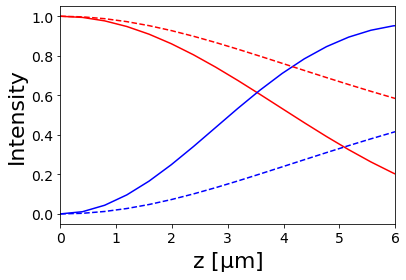

In [218]:
# labels = ['I_{AG}','|1 - E_{AG}|^2','|E_G|^2','|1 - E_G|^2']
colors = ['red','blue']
style = ['-','-']
fig,ax = plt.subplots()

# plot axial profiles compared to Gaussian-based traps
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = len(data)//2
    zpts = linspace(0,3.975155279503107e-05,len(data[0]))/1e-6

    ax.plot(zpts,data[xrow]/max(data[xrow]),label=l,color=c)#,lw=4)
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'z [$\mathrm{\mu m}$]',fontsize=22)
    ax.set_ylabel('Intensity',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((0,6))

style = ['-','-']

w0 = 1.35e-6 #0.974e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-2*(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
e_gz = lambda z: 1/sqrt(1+(z/zR)**2)

ax.plot(zpts,e_gz(zpts/1e6)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax.plot(zpts,(1 - e_gz(zpts/1e6)**2),color=colors[1],linestyle='--',label='$|1-E_G|^2$')  
# ax.legend(loc='center right')
savefigure('plt_z_confinement_red_blue.svg')

saved file to .\paper_data\plt_rho_confinement_red_blue_7967.svg


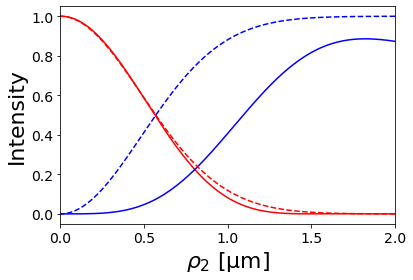

In [7]:
fig,ax = plt.subplots()
    
mag = 100
d=4e-4
    
labels = ['$|E_{AG}|^2$','$|1 - E_{AG}|^2$']#,'|E_G|^2','|1 - E_G|^2']
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = 0
    xpts = linspace(-d/mag,d/mag,len(data))
    
    datat = array(data).transpose()    
    ax.plot(xpts*1e6,datat[0],label=l,color=c)#,lw=4
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'$\rho_2$ [$\mathrm{\mu m}$]',fontsize=22)
    ax.set_ylabel('Intensity',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((-2,2))

w0 = 1.37e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-2*(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
    
ax.plot(xpts*1e6,e_g(xpts,0)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax.plot(xpts*1e6,(1 - e_g(xpts,0)**2),color=colors[1],linestyle='--',label='$|1-E_G|^2$')

# ax.plot(xpts*1e6,e_g(xpts,0)**2 - (array(axial_data[0][0]).transpose())[0],color='k',linestyle='--')
    
ax.set_xlim((0,2))
    
# ax.legend()
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# plt.show()
savefigure('plt_rho_confinement_red_blue.svg')

saved file to .\paper_data\plt_e_fields_babinet_5383.svg


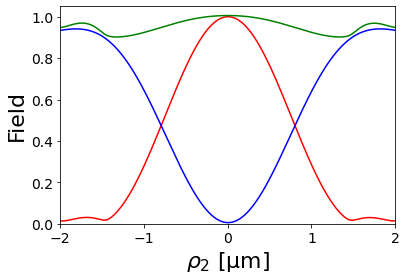

In [221]:
# verify Babinet's principle

fig,ax = plt.subplots()
    
mag = 100
d=4e-4
    
fieldsum = 0
    
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = 0
    xpts = linspace(-d/mag,d/mag,len(data))
    
    datat = array(data).transpose()    
    ax.plot(xpts*1e6,datat[0]**0.5,label=l,color=c)#,lw=4
    fieldsum += datat[0]**0.5
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'$\rho_2$ [$\mathrm{\mu m}$]',fontsize=22)
    ax.set_ylabel('Field',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((-2,2))
    ax.set_ylim((0,1.05))
    
ax.plot(xpts*1e6,fieldsum,c='green',label='$|E_{AG}|+|1 - E_{AG}|$')
savefigure('plt_e_fields_babinet.svg')

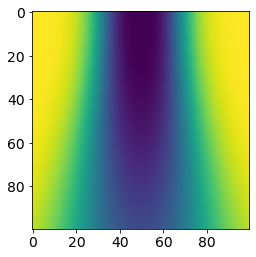

In [20]:
xarr = linspace(-2,2,100)*1e-6
zarr = linspace(0,6,100)*1e-6
xx,zz = meshgrid(xarr,zarr)
# plt.imshow(e_g(xx,zz))
plt.imshow((1-e_g(xx,zz))**2)

In [7]:
meta

['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0, t1=0, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']